In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# Data preprocessing
df = pd.read_csv("Position_Salaries.csv")
X = df.iloc[:, 1].values
y = df.iloc[:, -1].values
print(y)
print(X)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]
[ 1  2  3  4  5  6  7  8  9 10]


In [60]:
y = y.reshape(len(y), 1)
X = X.reshape(len(X), 1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = StandardScaler()
y = sc.fit_transform(y)
X = sc_x.fit_transform(X)
print(X)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [66]:
# Training SVR model
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

C:\Users\yohan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [98]:
sc.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))
print(sc.inverse_transform(y))
print(y)
print(X)

[[  45000.]
 [  50000.]
 [  60000.]
 [  80000.]
 [ 110000.]
 [ 150000.]
 [ 200000.]
 [ 300000.]
 [ 500000.]
 [1000000.]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]
[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


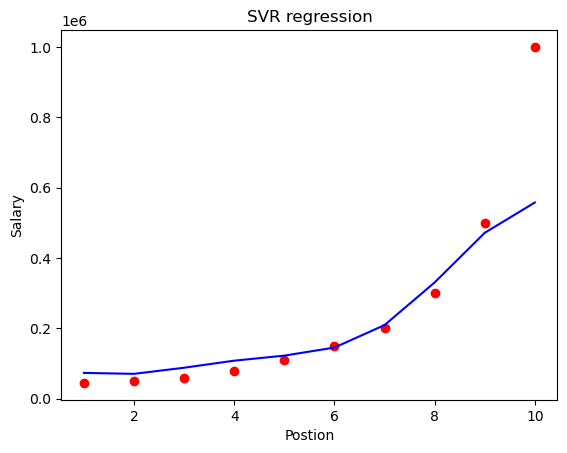

In [114]:
# Visualizing SVR results
plt.scatter(sc_x.inverse_transform(X), sc.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(X), sc.inverse_transform(regressor.predict(X).reshape(-1,1)), "b-")
plt.title("SVR regression")
plt.xlabel("Postion")
plt.ylabel("Salary")
plt.show()

C:\Users\yohan\AppData\Local\Temp\ipykernel_6800\66650329.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_x.inverse_transform(X)), max(sc_x.inverse_transform(X)), 0.1)


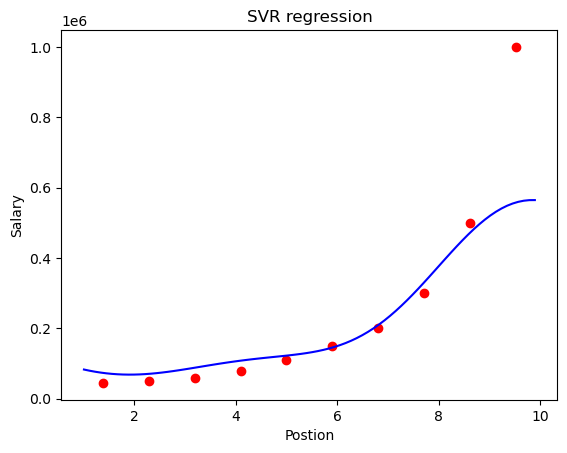

In [124]:
# Higher Resolution Vizualization
X_grid = np.arange(min(sc_x.inverse_transform(X)), max(sc_x.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
sc_g = StandardScaler()
plt.scatter(sc_x.inverse_transform(X), sc.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(sc_g.fit_transform(X_grid)), sc.inverse_transform(regressor.predict(sc_g.fit_transform(X_grid)).reshape(-1,1)), "b-")
plt.title("SVR regression")
plt.xlabel("Postion")
plt.ylabel("Salary")
plt.show()